# Data Import and Initial Exploration

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("data_1.xlsx", na_values = [":", ""], index_col=[0, 1])
df

GDP  Inflation Rate  Population Growth  \
Time Country                                                       
2014 Belgium          104.272             0.5            56434.0   
     Bulgaria         103.268            -1.6           -87763.0   
     Czechia          103.212             0.4            25856.0   
     Denmark          104.029             0.4            32480.0   
     Germany          106.923             0.8           430074.0   
...                       ...             ...                ...   
2023 North Macedonia  131.036             9.0            -3707.0   
     Albania          158.601             5.3                NaN   
     Serbia           131.057            12.1           -36029.0   
     Turkiye          204.414            54.0            92824.0   
     Kosovo           170.061             4.9                NaN   

                            Export        Import  
Time Country                                      
2014 Belgium          4.271433e+11  4.259520e+11  
     Bulgaria         3.689581e+10  3.755127e+10  
     Czechia          1.715785e+11  1.583186e+11  
     Denmark          1.934701e+11  1.706914e+11  
     Germany          1.653100e+12  1.393838e+12  
...                            ...           ...  
2023 North Macedonia  1.069052e+10  1.274551e+10  
     Albania          9.104536e+09  1.032040e+10  
     Serbia           4.479989e+10  4.833253e+10  
     Turkiye          3.568998e+11  3.842403e+11  
     Kosovo           4.149652e+09  7.360350e+09  

[370 rows x 5 columns]

In [3]:
df.loc[(2016, 'Belgium')]

GDP                  1.070720e+02
Inflation Rate       1.800000e+00
Population Growth    4.061000e+04
Export               3.776062e+11
Import               3.767593e+11
Name: (2016, Belgium), dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 370 entries, (2014, 'Belgium') to (2023, 'Kosovo')
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GDP                370 non-null    float64
 1   Inflation Rate     370 non-null    float64
 2   Population Growth  363 non-null    float64
 3   Export             370 non-null    float64
 4   Import             370 non-null    float64
dtypes: float64(5)
memory usage: 25.1+ KB


In [5]:
df.isnull().sum()

GDP                  0
Inflation Rate       0
Population Growth    7
Export               0
Import               0
dtype: int64

In [6]:
df.describe()

,GDP,Inflation Rate,Population Growth,Export,Import
count,370.000000,370.000000,3.630000e+02,3.700000e+02,3.700000e+02
mean,121.997089,3.206541,4.716399e+04,2.359491e+11,2.175717e+11
std,22.151628,5.953631,2.004360e+05,3.380373e+11,3.042575e+11
min,78.070000,-1.700000,-9.138450e+05,1.240041e+09,2.455987e+09
25%,108.692750,0.400000,-1.456300e+04,2.322346e+10,2.314052e+10
50%,117.208000,1.600000,8.002000e+03,1.064080e+11,1.039878e+11
75%,130.864500,3.400000,5.536350e+04,2.940090e+11,2.724310e+11
max,240.036000,72.300000,1.193357e+06,1.964262e+12,1.802155e+12


In [7]:
contries = [
    "Belgium", "Bulgaria", "Czechia", "Denmark", "Germany", "Estonia", "Ireland",
    "Greece", "Spain", "France", "Croatia", "Italy", "Cyprus", "Latvia", "Lithuania",
    "Luxembourg", "Hungary", "Malta", "Netherlands", "Austria", "Poland", "Portugal",
    "Romania", "Slovenia", "Slovakia", "Finland", "Sweden", "Iceland", "Norway",
    "Switzerland", "Bosnia and Herzegovina", "Montenegro",
    "North Macedonia", "Albania", "Serbia", "Turkiye", "Kosovo"
]

In [8]:
filtered_data = df.loc[(2023,"Spain"), :]
filtered_data

GDP                  1.150970e+02
Inflation Rate       3.400000e+00
Population Growth    5.250970e+05
Export               6.165945e+11
Import               5.529770e+11
Name: (2023, Spain), dtype: float64

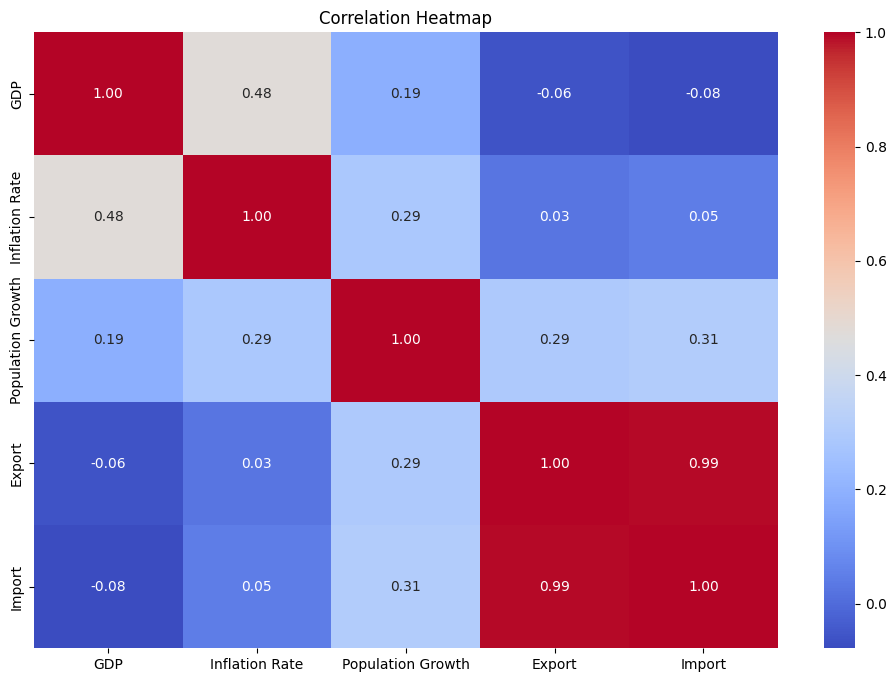

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


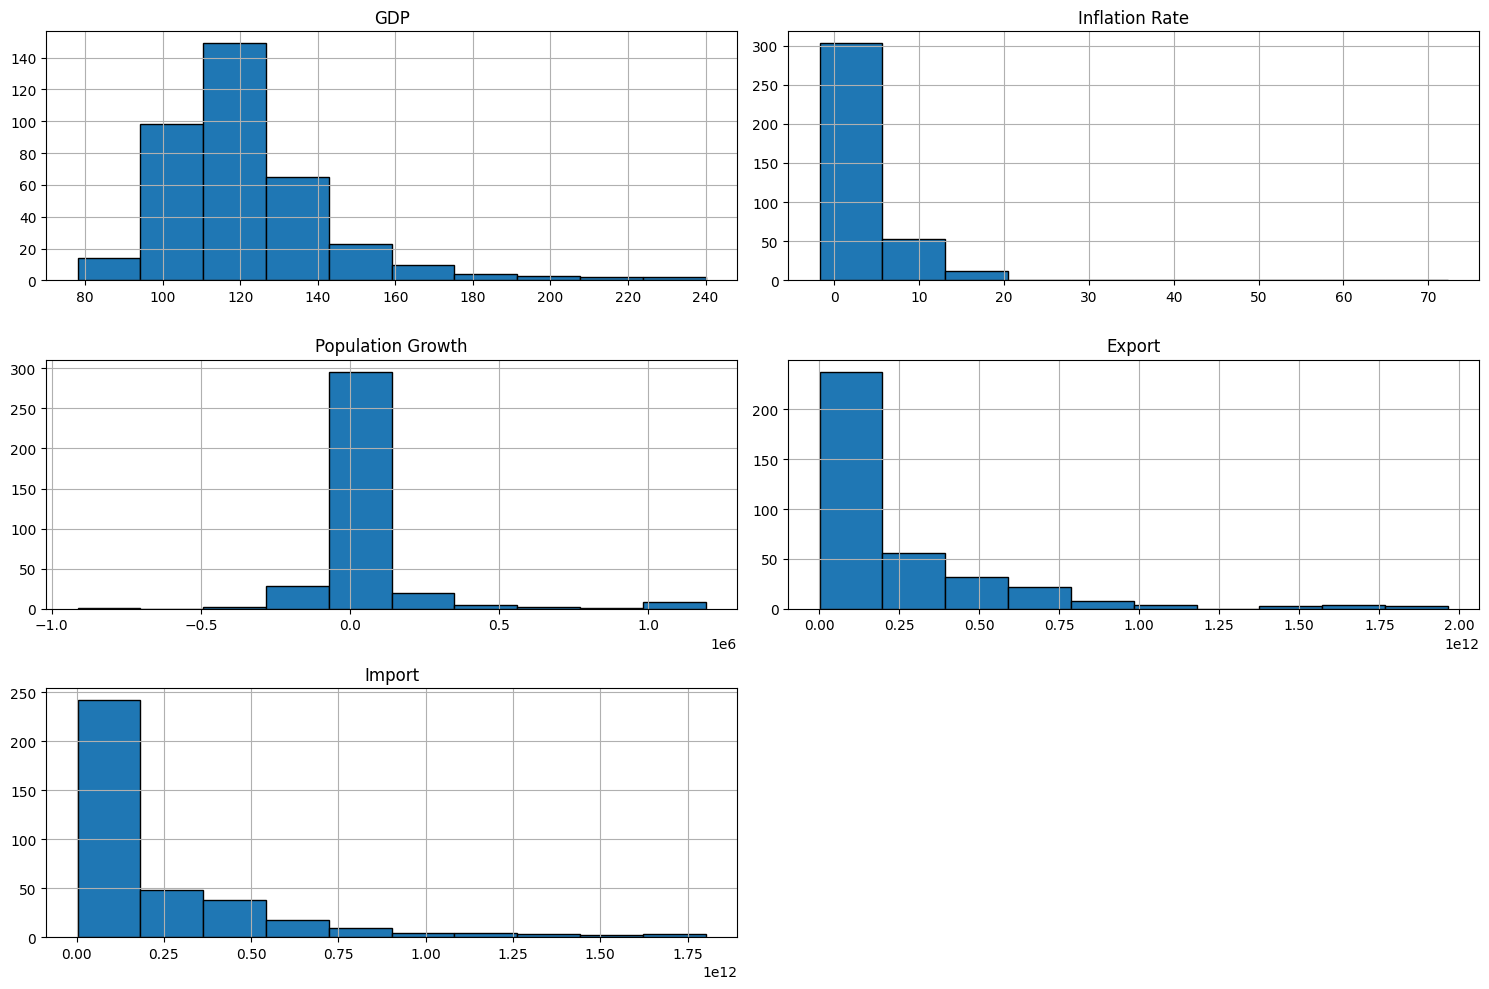

In [10]:
df.hist(figsize=(15, 10), bins=10, edgecolor='black')
plt.tight_layout()
plt.savefig("hist.png", dpi=300, bbox_inches="tight")
plt.show()

# Preprocessing

In [11]:
df

GDP  Inflation Rate  Population Growth  \
Time Country                                                       
2014 Belgium          104.272             0.5            56434.0   
     Bulgaria         103.268            -1.6           -87763.0   
     Czechia          103.212             0.4            25856.0   
     Denmark          104.029             0.4            32480.0   
     Germany          106.923             0.8           430074.0   
...                       ...             ...                ...   
2023 North Macedonia  131.036             9.0            -3707.0   
     Albania          158.601             5.3                NaN   
     Serbia           131.057            12.1           -36029.0   
     Turkiye          204.414            54.0            92824.0   
     Kosovo           170.061             4.9                NaN   

                            Export        Import  
Time Country                                      
2014 Belgium          4.271433e+11  4.259520e+11  
     Bulgaria         3.689581e+10  3.755127e+10  
     Czechia          1.715785e+11  1.583186e+11  
     Denmark          1.934701e+11  1.706914e+11  
     Germany          1.653100e+12  1.393838e+12  
...                            ...           ...  
2023 North Macedonia  1.069052e+10  1.274551e+10  
     Albania          9.104536e+09  1.032040e+10  
     Serbia           4.479989e+10  4.833253e+10  
     Turkiye          3.568998e+11  3.842403e+11  
     Kosovo           4.149652e+09  7.360350e+09  

[370 rows x 5 columns]

# Scaling the data

In [12]:
from sklearn.preprocessing import StandardScaler
columns = df.columns
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])

In [13]:
df

GDP  Inflation Rate  Population Growth    Export  \
Time Country                                                                  
2014 Belgium         -0.801254       -0.455219           0.046313  0.566367   
     Bulgaria        -0.846640       -0.808423          -0.674097 -0.589647   
     Czechia         -0.849171       -0.472038          -0.106455 -0.190682   
     Denmark         -0.812239       -0.472038          -0.073361 -0.125834   
     Germany         -0.681417       -0.404761           1.913022  4.197969   
...                        ...             ...                ...       ...   
2023 North Macedonia  0.408600        0.974415          -0.254152 -0.667274   
     Albania          1.654663        0.352104                NaN -0.671972   
     Serbia           0.409549        1.495810          -0.415633 -0.566233   
     Turkiye          3.725618        8.543063           0.228118  0.358287   
     Kosovo           2.172707        0.284827                NaN -0.686650   

                        Import  
Time Country                    
2014 Belgium          0.685809  
     Bulgaria        -0.592472  
     Czechia         -0.195010  
     Denmark         -0.154290  
     Germany          3.871256  
...                        ...  
2023 North Macedonia -0.674112  
     Albania         -0.682093  
     Serbia          -0.556990  
     Turkiye          0.548530  
     Kosovo          -0.691835  

[370 rows x 5 columns]

In [14]:
from sklearn.preprocessing import StandardScaler
columns = df.columns
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])

In [15]:
df

GDP  Inflation Rate  Population Growth    Export  \
Time Country                                                                  
2014 Belgium         -0.801254       -0.455219           0.046313  0.566367   
     Bulgaria        -0.846640       -0.808423          -0.674097 -0.589647   
     Czechia         -0.849171       -0.472038          -0.106455 -0.190682   
     Denmark         -0.812239       -0.472038          -0.073361 -0.125834   
     Germany         -0.681417       -0.404761           1.913022  4.197969   
...                        ...             ...                ...       ...   
2023 North Macedonia  0.408600        0.974415          -0.254152 -0.667274   
     Albania          1.654663        0.352104                NaN -0.671972   
     Serbia           0.409549        1.495810          -0.415633 -0.566233   
     Turkiye          3.725618        8.543063           0.228118  0.358287   
     Kosovo           2.172707        0.284827                NaN -0.686650   

                        Import  
Time Country                    
2014 Belgium          0.685809  
     Bulgaria        -0.592472  
     Czechia         -0.195010  
     Denmark         -0.154290  
     Germany          3.871256  
...                        ...  
2023 North Macedonia -0.674112  
     Albania         -0.682093  
     Serbia          -0.556990  
     Turkiye          0.548530  
     Kosovo          -0.691835  

[370 rows x 5 columns]

In [16]:
df.describe()

,GDP,Inflation Rate,Population Growth,Export,Import
count,370.000000,370.000000,3.630000e+02,3.700000e+02,3.700000e+02
mean,0.000000,0.000000,-2.446773e-18,4.800964e-18,-2.880579e-17
std,1.001354,1.001354,1.001380e+00,1.001354e+00,1.001354e+00
min,-1.985704,-0.825242,-4.801211e+00,-6.952690e-01,-7.079759e-01
25%,-0.601416,-0.472038,-3.083887e-01,-6.301485e-01,-6.399002e-01
50%,-0.216489,-0.270208,-1.956537e-01,-3.837342e-01,-3.738205e-01
75%,0.400847,0.032538,4.096484e-02,1.719887e-01,1.805496e-01
max,5.335894,11.620979,5.726392e+00,5.119710e+00,5.215085e+00


# Handeling missing values

In [17]:
df.isnull().sum()

GDP                  0
Inflation Rate       0
Population Growth    7
Export               0
Import               0
dtype: int64

In [18]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)  

df[df.columns] = imputer.fit_transform(df[df.columns])

In [19]:
df.isnull().sum()

GDP                  0
Inflation Rate       0
Population Growth    0
Export               0
Import               0
dtype: int64

# Training model for Belgium

In [20]:
years = [2014, 2015, 2016, 2017, 2018, 2018, 2019, 2020, 2021, 2022, 2023]

In [21]:
Belgium_data = df.loc[(years,"Belgium"), :]
Belgium_data

,,GDP,Inflation Rate,Population Growth,Export,Import
Time,Country,,,,,
2014,Belgium,-0.801254,-0.455219,0.046313,0.566367,0.685809
2015,Belgium,-0.731775,-0.438400,0.133289,0.364661,0.455208
2016,Belgium,-0.674682,-0.236569,-0.032744,0.419625,0.523909
2017,Belgium,-0.603304,-0.169292,-0.001509,0.539224,0.659825
2018,Belgium,-0.511087,-0.152473,0.048791,0.642995,0.798289
2019,Belgium,-0.388853,-0.337484,0.098706,0.620176,0.741221
2020,Belgium,-0.634540,-0.472038,-0.074126,0.543730,0.639412
2021,Belgium,-0.331805,-0.001100,0.078397,0.890096,1.012588
2022,Belgium,-0.112383,1.193064,0.389734,0.975789,1.173136


In [22]:
Belgium_data = Belgium_data.reset_index(level = "Country" , drop = True)

In [23]:
Belgium_data

,GDP,Inflation Rate,Population Growth,Export,Import
Time,,,,,
2014,-0.801254,-0.455219,0.046313,0.566367,0.685809
2015,-0.731775,-0.438400,0.133289,0.364661,0.455208
2016,-0.674682,-0.236569,-0.032744,0.419625,0.523909
2017,-0.603304,-0.169292,-0.001509,0.539224,0.659825
2018,-0.511087,-0.152473,0.048791,0.642995,0.798289
2019,-0.388853,-0.337484,0.098706,0.620176,0.741221
2020,-0.634540,-0.472038,-0.074126,0.543730,0.639412
2021,-0.331805,-0.001100,0.078397,0.890096,1.012588
2022,-0.112383,1.193064,0.389734,0.975789,1.173136


In [24]:
Belgium_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2014 to 2023
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GDP                10 non-null     float64
 1   Inflation Rate     10 non-null     float64
 2   Population Growth  10 non-null     float64
 3   Export             10 non-null     float64
 4   Import             10 non-null     float64
dtypes: float64(5)
memory usage: 480.0 bytes


# Split Data into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Belgium_data.drop(columns = 'GDP'), Belgium_data['GDP'], test_size = 0.2, shuffle = True, random_state = 42)

# Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1, include_bias = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

# Evaluation with test data for Regression model

In [27]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("Accuracy:", r2)

Accuracy: -0.40171354249329827


# Ridge Model

In [28]:
from sklearn.linear_model import Ridge
Ridge_model = Ridge(alpha=0.5)  
Ridge_model.fit(X_train, y_train)
y_pred = Ridge_model.predict(X_test)

# Evaluation with test data for Ridge model

In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("Accuracy:", r2)

Accuracy: 0.9661646947073201


# ElasticNet Model

In [30]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.5, l1_ratio = 0.5, random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation with test data for ElasticNet model before finidng the best parameters

In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("Accuracy:", r2)

Accuracy: -0.06134677933616706


# Grid Search for finding bet parameters for ElasticNet model

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}

elastic_net = ElasticNet(random_state=42)

grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

model = grid_search.best_estimator_

Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.1}


# Evaluation with test data for Grid Search model base on ElasticNet

In [33]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Accuracy:", r2)

Accuracy: 0.7390436140316403


# Collecting the coefficients of best model (Ridge) for Belgium

In [34]:
coefficients = Ridge_model.coef_
coefficients

array([0.1328521 , 0.12767897, 0.22670788, 0.25840838])